<a href="https://colab.research.google.com/github/jsroa15/Digit_Recognizer/blob/main/Digit_Recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Packages

In [2]:
#Load packages

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns


# Load Data

In [69]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Digit Recognizer/train.csv')
test=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Digit Recognizer/test.csv')

In [4]:
#Explore the dataset

data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# General Statistics

## Datatypes

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


It's a large number of colums, but the main point is that all datatypes are the same.


## Missing Data

In [7]:
sum(data.isna().sum())

0

No missing data in the dataset

## Labels


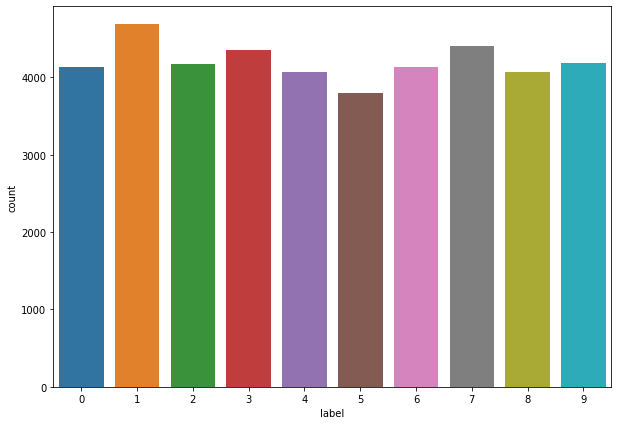

In [15]:
fig=plt.figure(figsize=(10,7))

sns.countplot(x=data.label)

plt.show()

From the above we can see that data is balanced across the labels.

# Data Preprocessing

In [93]:
#Split target Feature

y_train=data[['label']]

y_train=y_train.astype('object')

y_train=pd.get_dummies(y_train)

y_train=y_train.to_numpy()


In [94]:
#Extract Feature

X_train=data.drop('label',axis=1).to_numpy()


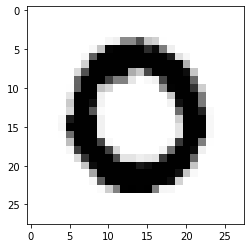

In [103]:
#Visualizing some images

ax,fig=plt.figure(figsize=(4,4))
for i in range(0,9):

  plt.imshow(X_train[i].reshape(28,28), cmap='Greys',ax)

# Modeling

For this project we are gonna implement an Artificial Neural Network to predict the hand-writen number.

We are gonna use Sequential model to implement the Neural Network

## Initializing the Neural Network

In [95]:
#Define Sequential Model

model=keras.Sequential()

# Define the first layer
model.add(keras.layers.Dense(400,activation='relu',input_shape=(784,)))

# Add activation function to classifier
model.add(keras.layers.Dense(10, activation='softmax'))

# Finish the model compilation
model.compile(optimizer='RMSprop',loss='categorical_crossentropy', metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 400)               314000    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                4010      
Total params: 318,010
Trainable params: 318,010
Non-trainable params: 0
_________________________________________________________________


## Fit Neural Network

In [104]:
#Complete the model fit operation

model.fit(X_train, y_train, epochs=10,batch_size=128)

Epoch 1/10
329/329 [==============================] - 3s 8ms/step - loss: 0.2096 - accuracy: 0.9870
Epoch 2/10
329/329 [==============================] - 3s 8ms/step - loss: 0.1817 - accuracy: 0.9894
Epoch 3/10
329/329 [==============================] - 3s 8ms/step - loss: 0.1661 - accuracy: 0.9900
Epoch 4/10
329/329 [==============================] - 3s 8ms/step - loss: 0.1338 - accuracy: 0.9916
Epoch 5/10
329/329 [==============================] - 3s 8ms/step - loss: 0.1147 - accuracy: 0.9923
Epoch 6/10
329/329 [==============================] - 3s 8ms/step - loss: 0.1175 - accuracy: 0.9925
Epoch 7/10
329/329 [==============================] - 3s 8ms/step - loss: 0.1005 - accuracy: 0.9938
Epoch 8/10
329/329 [==============================] - 3s 8ms/step - loss: 0.1059 - accuracy: 0.9934
Epoch 9/10
329/329 [==============================] - 3s 8ms/step - loss: 0.0995 - accuracy: 0.9943
Epoch 10/10
329/329 [==============================] - 3s 8ms/step - loss: 0.0736 - accuracy: 0.9949

In [102]:
y_train

array([[0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=uint8)